**This notebook contains Exercise-2 of Lab 11**

**Jayant kumar jha(23M1730)**

# **Q.1**

**Since we have to minimize the total cost of the production of Boxes with fulfilling the demands of each boxes we will formulate our Objective function as:**


**Let $X_i$ denote the number of boxes of type $i$ produced. Then,**

$$
Y_i =
\begin{cases}
0 & \text{if type } i \text{ box is not produced,} \\
1 & \text{if type } i \text{ box is produced.}
\end{cases}
$$


$$
\text{Minimize} \quad 100 \times (0.15 \cdot X_1 + 0.25 \cdot X_2 + 0.35 \cdot X_3 + 0.5 \cdot X_4 + 0.6 \cdot X_5 + 0.75 \cdot X_6) + 1500 \times (Y_1 + Y_2 + Y_3 + Y_4 + Y_5 + Y_6)
$$


**The constraints for the problem are as follows:**

\begin{align*}
& X_1 + X_2 + X_3 + X_4 + X_5 + X_6 \geq 2280, & \text{(Demand for Box 1)} \\
& X_2 + X_3 + X_4 + X_5 + X_6 \geq 1980, & \text{(Demand for Box 2)} \\
& X_3 + X_4 + X_5 + X_6 \geq 1530, & \text{(Demand for Box 3)} \\
& X_4 + X_5 + X_6 \geq 1450, & \text{(Demand for Box 4)} \\
& X_5 + X_6 \geq 950, & \text{(Demand for Box 5)} \\
& X_6 \geq 800, & \text{(Demand for Box 6)} \\
& X_1 + X_2 + X_3 + X_4 + X_5 + X_6 \geq 2280. & \text{(Total Demand)}
\end{align*}


In [1]:
!pip install pulp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.7/17.7 MB 43.0 MB/s eta 0:00:00


In [2]:
import pulp

# Define the problem
problem = pulp.LpProblem("Minimize_Box_Costs", pulp.LpMinimize)

# Decision Variables
X = pulp.LpVariable.dicts("X", range(1, 7), lowBound=0, cat='Continuous')
Y = pulp.LpVariable.dicts("Y", range(1, 7), cat='Binary')

# Objective Function
problem += 100 * (0.15 * X[1] + 0.25 * X[2] + 0.35 * X[3] + 0.5 * X[4] + 0.6 * X[5] + 0.75 * X[6]) \
           + 1500 * (Y[1] + Y[2] + Y[3] + Y[4] + Y[5] + Y[6]), "Total Cost"

# Constraints
problem += X[1] + X[2] + X[3] + X[4] + X[5] + X[6] >= 2280, "Demand for Box 1"
problem += X[2] + X[3] + X[4] + X[5] + X[6] >=1980, "Demand for Box 2"
problem += X[3] + X[4] + X[5] + X[6] >= 1530, "Demand for Box 3"
problem += X[4] + X[5] + X[6] >= 1450, "Demand for Box 4"
problem += X[5] + X[6] >= 950, "Demand for Box 5"
problem += X[6] >= 800, "Demand for Box 6"
problem += X[1] + X[2] + X[3] + X[4] + X[5] + X[6] >= 2280, "Total Demand"

# Linking X_i with Y_i
M = 1000  # Large number for linking
for i in range(1, 7):
    problem += X[i] <= M * Y[i], f"Linking_{i}"

# Solve the problem
problem.solve()

# Output the results
for i in range(1, 7):
    print(f"X{i}: {X[i].varValue}, Y{i}: {Y[i].varValue}")
print(f"Total Cost: {pulp.value(problem.objective)}")


X1: 300.0, Y1: 1.0
X2: 450.0, Y2: 1.0
X3: 0.0, Y3: 0.0
X4: 580.0, Y4: 1.0
X5: 150.0, Y5: 1.0
X6: 800.0, Y6: 1.0
Total Cost: 121250.0


# **Q.2**

In [4]:
import sys

def dijkstra(graph, source):
    vertices = len(graph)
    dist = [sys.maxsize] * vertices
    dist[source] = 0
    visited = [False] * vertices

    for _ in range(vertices):
        min_dist = sys.maxsize
        min_dist_index = 0

        for v in range(vertices):
            if dist[v] < min_dist and not visited[v]:
                min_dist = dist[v]
                min_dist_index = v

        visited[min_dist_index] = True
        for v in range(vertices):
            if graph[min_dist_index][v] > 0 and not visited[v] and \
                    dist[v] > dist[min_dist_index] + graph[min_dist_index][v]:
                dist[v] = dist[min_dist_index] + graph[min_dist_index][v]

    return dist

In [5]:
import sys

graph_array = [
    [0, 300*15+1500, (300+450)*25+1500, (300+450+80)*35+1500, (300+450+80+500)*50+1500, (300+450+80+500+150)*60+1500, (300+450+80+500+150+800)*75+1500],
    [sys.maxsize, 0, 450*25+1500, (450+80)*35+1500, (450+80+500)*50+1500, (450+80+500+150)*60+1500,(450+80+500+150+800)*75+1500],
    [sys.maxsize, sys.maxsize, 0,  80*35+1500, (80+500)*50+1500, (80+500+150)*60+1500, (80+500+150+800)*75+1500],
    [sys.maxsize, sys.maxsize, sys.maxsize, 0, 500*50+1500, (500+150)*60+1500, (500+150+800)*75+1500],
    [sys.maxsize, sys.maxsize, sys.maxsize,  sys.maxsize, 0,  150*60+1500, (150+800)*75+1500],
    [sys.maxsize, sys.maxsize,  sys.maxsize,  sys.maxsize,  sys.maxsize, 0,  800*75+1500],
    [sys.maxsize, sys.maxsize, sys.maxsize, sys.maxsize, sys.maxsize,   sys.maxsize,  0],
]

source_vertex = 0
shortest_distances = dijkstra(graph_array, source_vertex)
print(f'The optimal cost is :\n{[x for x in shortest_distances][-1]}')

The optimal cost is :
121250


In [6]:
print(graph_array)
print(shortest_distances)
differences = [shortest_distances[i+1] - shortest_distances[i] for i in range(len(shortest_distances)-1)]
differences

[[0, 6000, 20250, 30550, 68000, 90300, 172500], [9223372036854775807, 0, 12750, 20050, 53000, 72300, 150000], [9223372036854775807, 9223372036854775807, 0, 4300, 30500, 45300, 116250], [9223372036854775807, 9223372036854775807, 9223372036854775807, 0, 26500, 40500, 110250], [9223372036854775807, 9223372036854775807, 9223372036854775807, 9223372036854775807, 0, 10500, 72750], [9223372036854775807, 9223372036854775807, 9223372036854775807, 9223372036854775807, 9223372036854775807, 0, 61500], [9223372036854775807, 9223372036854775807, 9223372036854775807, 9223372036854775807, 9223372036854775807, 9223372036854775807, 0]]
[0, 6000, 18750, 23050, 49250, 59750, 121250]


[6000, 12750, 4300, 26200, 10500, 61500]

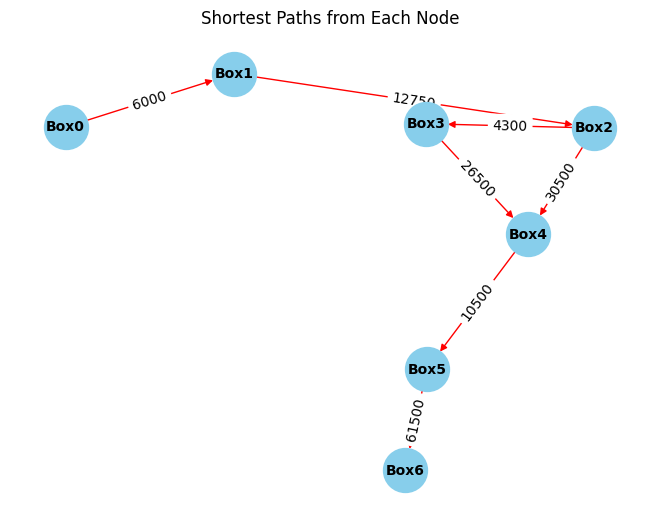

In [8]:
import networkx as nx
import matplotlib.pyplot as plt

# Define graph nodes and edges
nodes = ['Box0', 'Box1', 'Box2', 'Box3', 'Box4', 'Box5', 'Box6']
edges = [
    ('Box0', 'Box1', 300*15+1500), ('Box0', 'Box2', (300+450)*25+1500), ('Box0', 'Box3', (300+450+80)*35+1500),
    ('Box0', 'Box4', (300+450+80+500)*50+1500), ('Box0', 'Box5', (300+450+80+500+150)*60+1500), ('Box0', 'Box6', (300+450+80+500+150+800)*75+1500),
    ('Box1', 'Box2', 450*25+1500), ('Box1', 'Box3', (450+80)*35+1500), ('Box1', 'Box4', (450+80+500)*50+1500),
    ('Box1', 'Box5', (450+80+500+150)*60+1500), ('Box1', 'Box6', (450+80+500+150+800)*75+1500),
    ('Box2', 'Box3', 80*35+1500), ('Box2', 'Box4', (80+500)*50+1500), ('Box2', 'Box5', (80+500+150)*60+1500),
    ('Box2', 'Box6', (80+500+150+800)*75+1500),
    ('Box3', 'Box4', 500*50+1500), ('Box3', 'Box5', (500+150)*60+1500), ('Box3', 'Box6', (500+150+800)*75+1500),
    ('Box4', 'Box5', 150*60+1500), ('Box4', 'Box6', (150+800)*75+1500),
    ('Box5', 'Box6', 800*75+1500)
]

# Create directed graph
G = nx.DiGraph()

# Add nodes and edges to the graph
G.add_nodes_from(nodes)
G.add_weighted_edges_from(edges)

# Find shortest paths from each node using Dijkstra's algorithm
shortest_paths = {}
for node in nodes:
    shortest_paths[node] = nx.single_source_dijkstra_path(G, node)

# Create a new graph to plot shortest paths only
G_shortest_paths = nx.DiGraph()

# Add shortest paths to the new graph
for node in shortest_paths:
    for destination in shortest_paths[node]:
        path = shortest_paths[node][destination]
        path_edges = [(path[i], path[i+1]) for i in range(len(path)-1)]
        G_shortest_paths.add_edges_from(path_edges)

# Create graph layout
pos = nx.spring_layout(G_shortest_paths)

# Draw graph
nx.draw(G_shortest_paths, pos, with_labels=True, node_size=1000, node_color='skyblue', font_size=10, font_weight='bold', edge_color='red', arrows=True)

# Add edge labels
edge_labels = {(edge[0], edge[1]): G[edge[0]][edge[1]]['weight'] for edge in G_shortest_paths.edges()}
nx.draw_networkx_edge_labels(G_shortest_paths, pos, edge_labels=edge_labels)

# Show plot
plt.title('Shortest Paths from Each Node')
plt.show()



So the number of each box types to be made are:
box1 -> 300

box2 -> 450

box3 -> 0  (The differences array contains 26200 which does not match with the elemet of matrix that means there is another shoet way to go forward except 3)

box4 -> 580

box5 -> 150

box6 -> 800

# **Q.3**

**The objective function for the profit maximization problem for the given space can be written as:**

**The objective function, representing the total cost to be minimized, is given by:**

$$
\text{Minimize} \quad \left( (300 - 0.15 \times 100 \times X_1) + (300 - 0.25 \times 100) \times X_2 + (350 - 0.35 \times 100) \times X_3 + (500 - 0.5 \times 100) \times X_4 + (600 - 0.6 \times 100) \times X_5 + (800 - 0.75 \times 100) \times X_6 \right) - 1500 \times (Y_1 + Y_2 + Y_3 + Y_4 + Y_5 + Y_6)**
$$


**The constraints for the problem are defined as follows:**

**\begin{align*}
& X_1 + X_2 + X_3 + X_4 + X_5 + X_6 \leq 2280, & \text{(Demand for Box 1)} \\
& X_2 + X_3 + X_4 + X_5 + X_6 \leq 1980, & \text{(Demand for Box 2)} \\
& X_3 + X_4 + X_5 + X_6 \leq 1530, & \text{(Demand for Box 3)} \\
& X_4 + X_5 + X_6 \leq 1450, & \text{(Demand for Box 4)} \\
& X_5 + X_6 \leq 950, & \text{(Demand for Box 5)} \\
& X_6 \leq 800, & \text{(Demand for Box 6)} \\
& 0.15X_1 + 0.25X_2 + 0.35X_3 + 0.5X_4 + 0.6X_5 + 0.75X_6 = 1000, & \text{(Total Space)}
\end{align*}**


# **Q.4**

### **The problem has been already formulated in question 3 and now we can give it to a solver and get the result.**

In [7]:
import pulp

# Define the problem
problem = pulp.LpProblem("Maximize_Box_Costs", pulp.LpMaximize)

# Decision Variables
X = pulp.LpVariable.dicts("X", range(1, 7), lowBound=0, cat='Continuous')
Y = pulp.LpVariable.dicts("Y", range(1, 7), cat='Binary')

# Objective Function
problem += ((300-0.15*100)*X[1] + (300-0.25*100)*X[2] + (350-0.35*100 )* X[3] + (500- 0.5 *100)*X[4] + (600-0.6*100)*X[5] + (800-0.75*100)*X[6]) -1500 * (Y[1] + Y[2] + Y[3] + Y[4] + Y[5] + Y[6]), "Total Cost"

# Constraints
problem += X[1] + X[2] + X[3] + X[4] + X[5] + X[6] <= 2280, "Demand for Box 1"
problem += X[2] + X[3] + X[4] + X[5] + X[6] <=1980, "Demand for Box 2"
problem += X[3] + X[4] + X[5] + X[6] <= 1530, "Demand for Box 3"
problem += X[4] + X[5] + X[6] <= 1450, "Demand for Box 4"
problem += X[5] + X[6] <= 950, "Demand for Box 5"
problem += X[6] <= 800, "Demand for Box 6"

problem += 0.15*X[1] + 0.25*X[2] + 0.35*X[3] + 0.5*X[4] + 0.6*X[5] + 0.75*X[6] <= 1000, "Volume capacity"

# Linking X_i with Y_i
M = 1000  # Large number for linking
for i in range(1, 7):
    problem += X[i] <= M * Y[i], f"Linking_{i}"

# Solve the problem
problem.solve()

# Output the results
for i in range(1, 7):
    print(f"X{i}: {X[i].varValue}, Y{i}: {Y[i].varValue}")
print(f"Total Profit: {pulp.value(problem.objective)}")

X1: 1000.0, Y1: 1.0
X2: 0.0, Y2: 0.0
X3: 0.0, Y3: 0.0
X4: 380.0, Y4: 1.0
X5: 100.0, Y5: 1.0
X6: 800.0, Y6: 1.0
Total Profit: 1084000.0
